In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
from functions.evaluation import Evaluator, EvaluationResult
from functions.load import saveBestParameterModel
from pandas import read_csv

df_user = read_csv('../data/ridge_features_refined_data.csv')
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Area,2927.0,7.476842e-16,1.000171,-3.775920,-0.346207,0.120200,0.514420,6.272148
Overall_Qual,2927.0,6.090878e+00,1.406195,1.000000,5.000000,6.000000,7.000000,10.000000
Overall_Cond,2927.0,5.563717e+00,1.111960,1.000000,5.000000,5.000000,6.000000,9.000000
Mas_Vnr_Area,2927.0,0.000000e+00,1.000171,-0.790677,-0.790677,-0.790677,1.156440,2.029755
Exter_Qual,2927.0,2.396994e+00,0.578344,1.000000,2.000000,2.000000,3.000000,4.000000
...,...,...,...,...,...,...,...,...
Garage_Type_No_Garage,2927.0,5.363854e-02,0.225342,0.000000,0.000000,0.000000,0.000000,1.000000
Sale_Type_'WD ',2927.0,8.664161e-01,0.340263,0.000000,1.000000,1.000000,1.000000,1.000000
Year_Sold,2927.0,2.007791e+03,1.317120,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000
Mo_Sold,2927.0,6.215237e+00,2.712368,1.000000,4.000000,6.000000,8.000000,12.000000


# AdaBoost

In [3]:
from sklearn.ensemble import AdaBoostRegressor


ADA = Evaluator(AdaBoostRegressor(), df_user, 'Sale_Price')

params, scores = ADA.grid_search_cv({
    'loss': ['linear', 'exponential', 'square'],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.2, 0.1, 0.01, 0.001]
})

saveBestParameterModel(type(ADA.model).__name__, params)
params, scores

({'learning_rate': 0.2,
  'loss': 'exponential',
  'n_estimators': 300,
  'model_name': 'AdaBoostRegressor'},
 0.852157399188872)

In [4]:
ADA = Evaluator(AdaBoostRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'],
                loss=params['loss']), df_user, 'Sale_Price')
ADA.split_dataset()

In [5]:
ADA.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.84844  -  explained_variance: 0.85442  -  rmse: 0.35478  -  mae: 0.20356  -  max_error: 1.59497

[Split 1/10] - train_size: 0.183
r2: 0.88439  -  explained_variance: 0.89356  -  rmse: 0.34658  -  mae: 0.21953  -  max_error: 1.35882

[Split 2/10] - train_size: 0.274
r2: 0.83937  -  explained_variance: 0.84029  -  rmse: 0.43235  -  mae: 0.22169  -  max_error: 1.82657

[Split 3/10] - train_size: 0.365
r2: 0.89206  -  explained_variance: 0.90204  -  rmse: 0.30386  -  mae: 0.18112  -  max_error: 1.00998

[Split 4/10] - train_size: 0.456
r2: 0.85464  -  explained_variance: 0.89105  -  rmse: 0.33953  -  mae: 0.23633  -  max_error: 1.11391

[Split 5/10] - train_size: 0.546
r2: 0.83386  -  explained_variance: 0.83852  -  rmse: 0.41092  -  mae: 0.20555  -  max_error: 1.70933

[Split 6/10] - train_size: 0.637
r2: 0.79795  -  explained_variance: 0.79806  -  rmse: 0.50273  -  mae: 0.22565  -  max_error: 4.42972

[Split 7/10] - train_size: 0.728
r2: 0.85604  - 

'r2: 0.85347  -  explained_variance: 0.86114  -  rmse: 0.37641  -  mae: 0.21340  -  max_error: 1.75559'

r2:                  0.83637
explained_variance:  0.83678
rmse:                0.40881
mae:                 0.22347
max_error:           4.03185


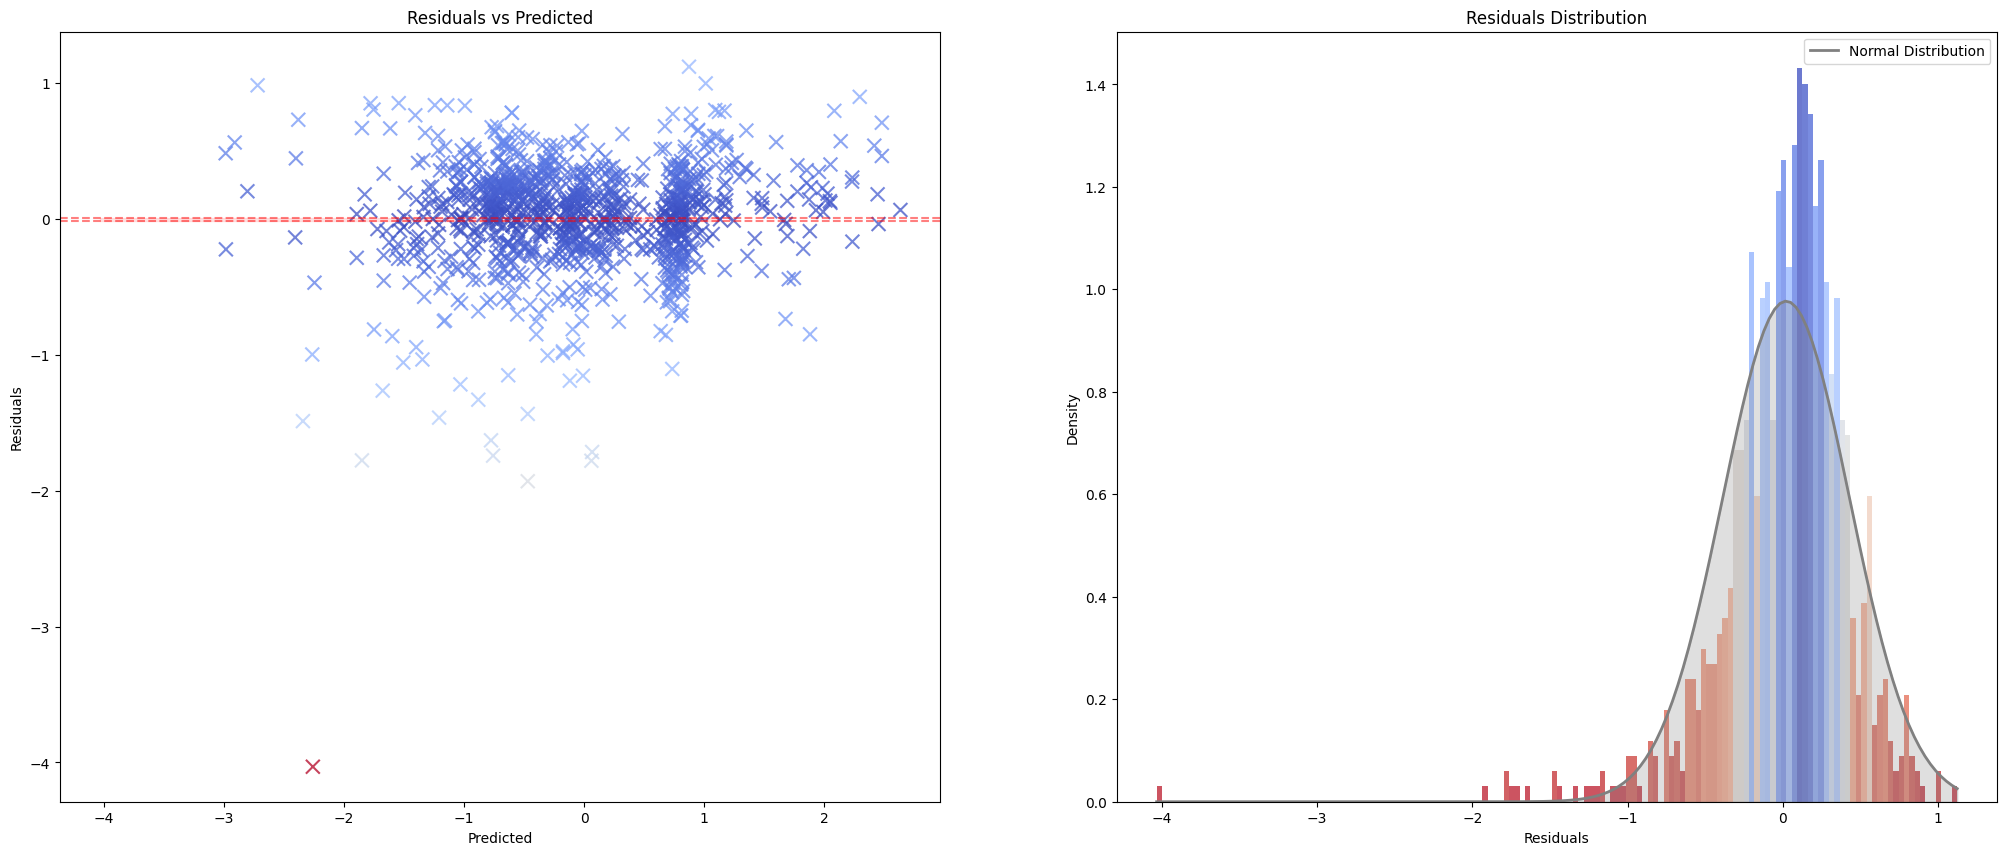

In [6]:
print(ADA.evaluate())
ADA.plot_residuals()

# XGBoost

In [7]:
from xgboost import XGBRegressor


XGB = Evaluator(XGBRegressor(nthread=4), df_user, 'Sale_Price')

params, scores = XGB.grid_search_cv({
    'booster': ['gbtree', 'gblinear'],
    'learning_rate': [0.2, 0.1, 0.01, 0.001]
})

saveBestParameterModel(type(XGB.model).__name__, params)
params, scores

({'booster': 'gbtree', 'learning_rate': 0.1, 'model_name': 'XGBRegressor'},
 0.9153149735646297)

In [8]:
XGB = Evaluator(XGBRegressor(booster=params['booster'], learning_rate=params['learning_rate']), df_user, 'Sale_Price')
XGB.split_dataset()

In [9]:
XGB.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.86732  -  explained_variance: 0.86760  -  rmse: 0.33195  -  mae: 0.20068  -  max_error: 1.24912

[Split 1/10] - train_size: 0.183
r2: 0.89897  -  explained_variance: 0.90001  -  rmse: 0.32400  -  mae: 0.17026  -  max_error: 1.27817

[Split 2/10] - train_size: 0.274
r2: 0.88027  -  explained_variance: 0.88191  -  rmse: 0.37327  -  mae: 0.17614  -  max_error: 1.73284

[Split 3/10] - train_size: 0.365
r2: 0.92624  -  explained_variance: 0.92670  -  rmse: 0.25118  -  mae: 0.14293  -  max_error: 0.98789

[Split 4/10] - train_size: 0.456
r2: 0.92056  -  explained_variance: 0.92450  -  rmse: 0.25100  -  mae: 0.15228  -  max_error: 1.16093

[Split 5/10] - train_size: 0.546
r2: 0.89270  -  explained_variance: 0.89277  -  rmse: 0.33023  -  mae: 0.14494  -  max_error: 1.42642

[Split 6/10] - train_size: 0.637
r2: 0.84144  -  explained_variance: 0.84256  -  rmse: 0.44535  -  mae: 0.16444  -  max_error: 4.04730

[Split 7/10] - train_size: 0.728
r2: 0.91760  - 

'r2: 0.89675  -  explained_variance: 0.89802  -  rmse: 0.31560  -  mae: 0.15595  -  max_error: 1.66472'

r2:                  0.88299
explained_variance:  0.88361
rmse:                0.34571
mae:                 0.14683
max_error:           3.83856


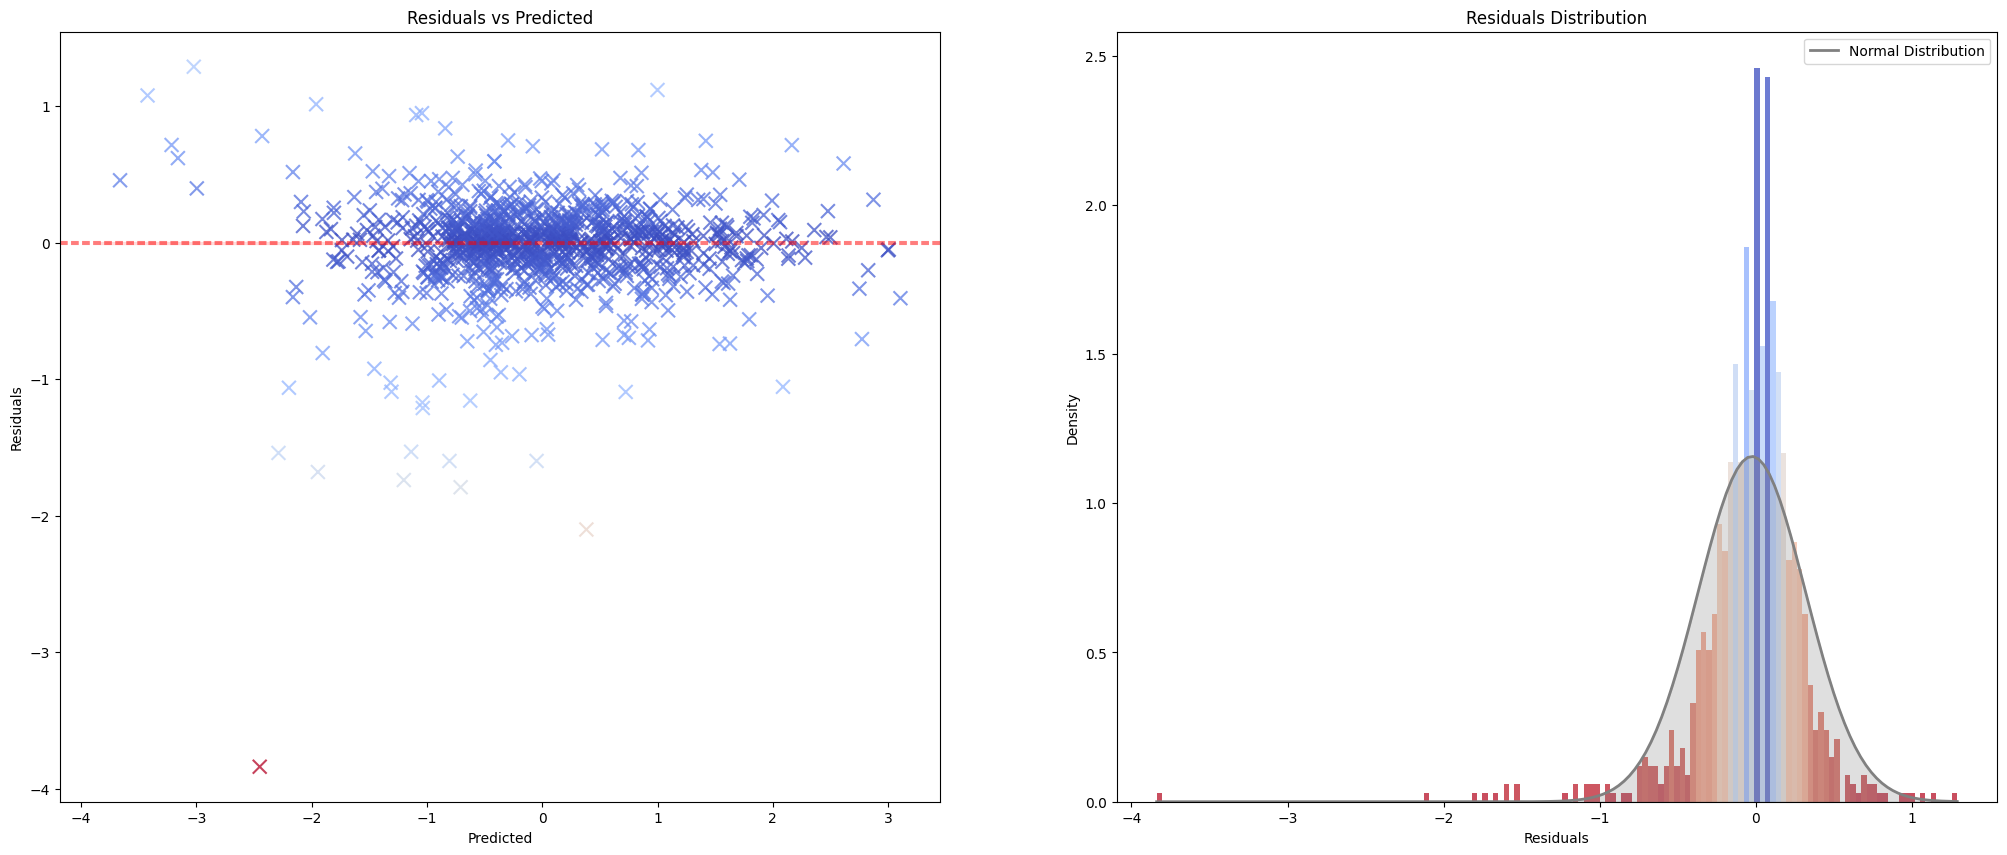

In [10]:
print(XGB.evaluate())
XGB.plot_residuals()

# Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = Evaluator(GradientBoostingRegressor(), df_user, 'Sale_Price')

params, scores = GBR.grid_search_cv({
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.2, 0.1, 0.01, 0.001],
    'max_depth': [4, 6, 8, 10]
})

saveBestParameterModel(type(GBR.model).__name__, params)
params, scores

({'learning_rate': 0.1,
  'max_depth': 4,
  'n_estimators': 300,
  'model_name': 'GradientBoostingRegressor'},
 0.9221159679212676)

In [12]:
GBR = Evaluator(GradientBoostingRegressor(n_estimators=params['n_estimators'], 
                learning_rate=params['learning_rate'], max_depth=params['max_depth']), df_user, 'Sale_Price')
GBR.split_dataset()

In [13]:
GBR.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.88114  -  explained_variance: 0.88401  -  rmse: 0.31419  -  mae: 0.16773  -  max_error: 1.31531

[Split 1/10] - train_size: 0.183
r2: 0.91810  -  explained_variance: 0.91970  -  rmse: 0.29171  -  mae: 0.17707  -  max_error: 1.13571

[Split 2/10] - train_size: 0.274
r2: 0.88208  -  explained_variance: 0.88258  -  rmse: 0.37043  -  mae: 0.16757  -  max_error: 1.77694

[Split 3/10] - train_size: 0.365
r2: 0.92953  -  explained_variance: 0.93015  -  rmse: 0.24551  -  mae: 0.13448  -  max_error: 1.22316

[Split 4/10] - train_size: 0.456
r2: 0.91618  -  explained_variance: 0.92166  -  rmse: 0.25782  -  mae: 0.14185  -  max_error: 1.04947

[Split 5/10] - train_size: 0.546
r2: 0.89208  -  explained_variance: 0.89252  -  rmse: 0.33119  -  mae: 0.15168  -  max_error: 1.25240

[Split 6/10] - train_size: 0.637
r2: 0.87472  -  explained_variance: 0.87484  -  rmse: 0.39587  -  mae: 0.15871  -  max_error: 3.61827

[Split 7/10] - train_size: 0.728
r2: 0.93148  - 

'r2: 0.90688  -  explained_variance: 0.90853  -  rmse: 0.29894  -  mae: 0.14645  -  max_error: 1.52496'

r2:                  0.89431
explained_variance:  0.89501
rmse:                0.32855
mae:                 0.14404
max_error:           3.58786


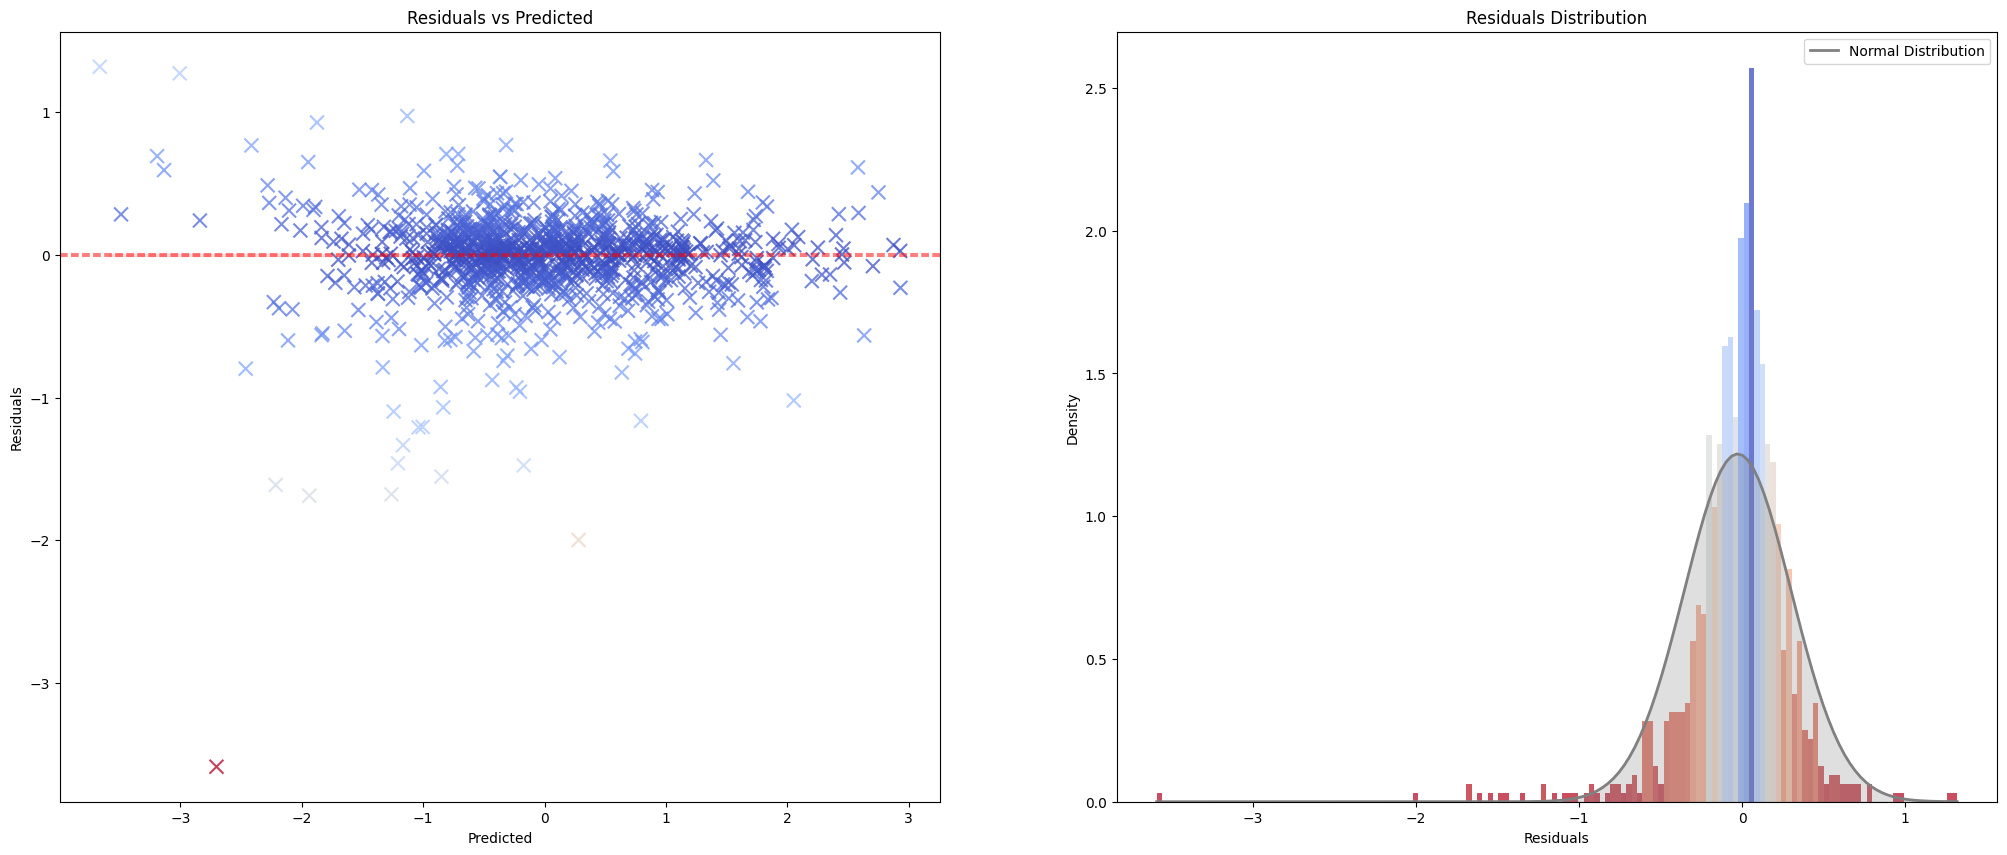

In [14]:
print(GBR.evaluate())
GBR.plot_residuals()